Model R^2 Score: 0.9941875899714343


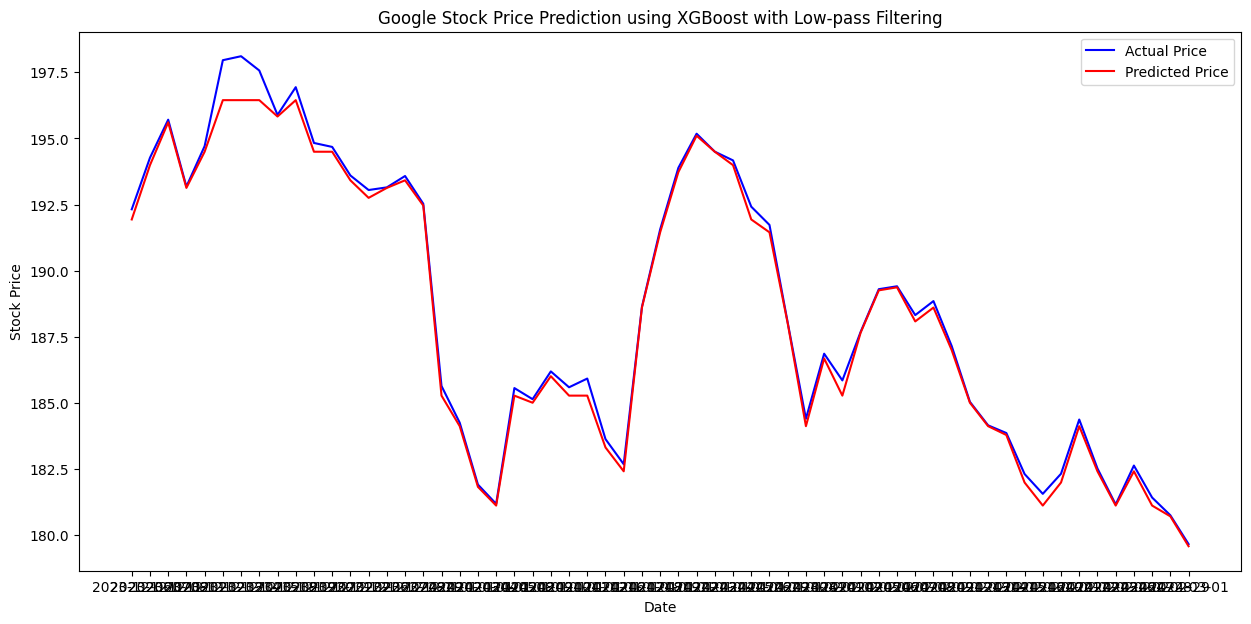

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor


data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv', thousands=',')
data = data[['Date', 'Close']]
data['Close'] = data['Close'].apply(lambda x: float(x))


close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0


filtered_close = np.fft.ifft(fft_list)


data['Filtered_Close'] = filtered_close.real


X = data[['Filtered_Close']]
y = data['Close']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)
xgb_model.fit(X_train, y_train)


score = xgb_model.score(X_test, y_test)
print(f"Model R^2 Score: {score}")


y_pred = xgb_model.predict(X_test)


plt.figure(figsize=(15, 7))
plt.plot(data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction using XGBoost with Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Mean Absolute Percentage Error (MAPE): 0.10%


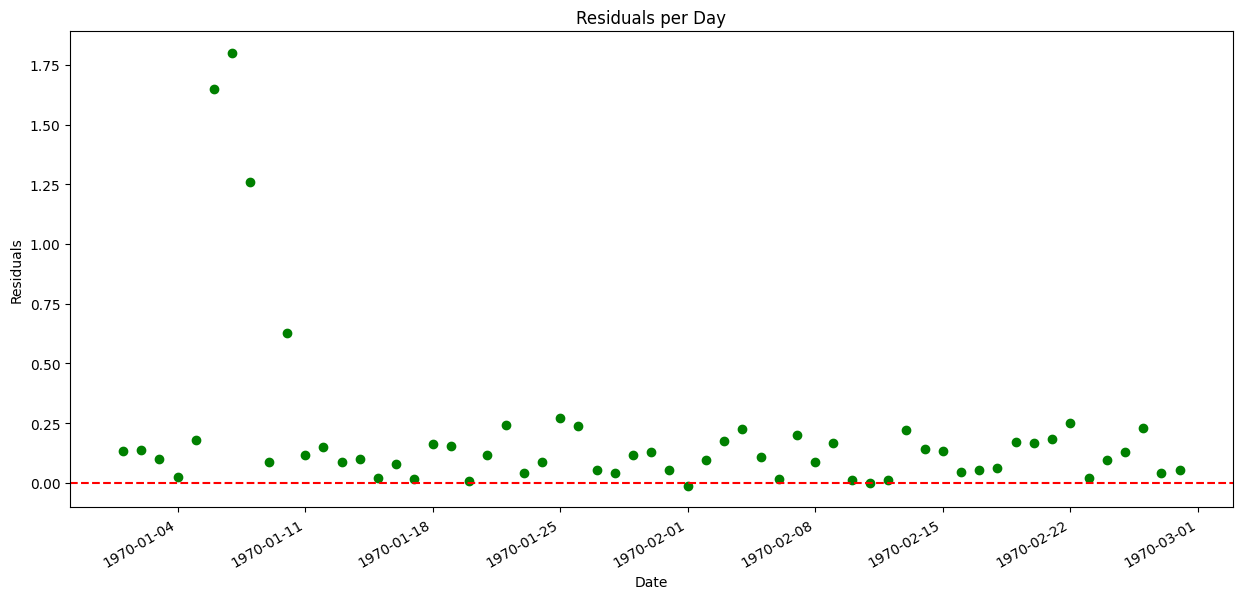

In [ ]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

import matplotlib.dates as mdates


residuals = y_test - y_pred


plt.figure(figsize=(15, 7))
plt.scatter(data['Date'][-len(y_test):], residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals per Day')
plt.xlabel('Date')
plt.ylabel('Residuals')


date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gcf().autofmt_xdate()

plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 0.16486860613212342


R-squared Score: 0.9937855172746085


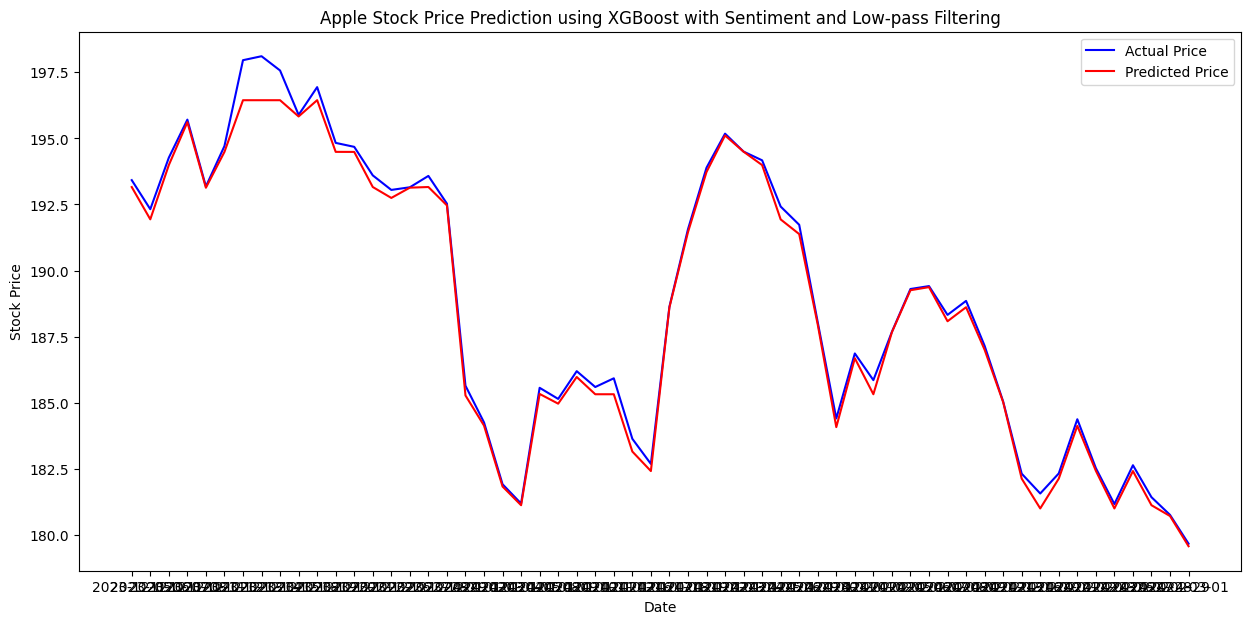

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


apple_sentiment_data = pd.read_csv('/content/Apple_close_high_sent.csv')
apple_stock_data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv')


merged_data = pd.merge(apple_sentiment_data, apple_stock_data, on='Date', how='inner')


encoder = OrdinalEncoder()
merged_data['Sent_encoded'] = encoder.fit_transform(merged_data[['Sent']])


close_fft = np.fft.fft(merged_data['Close'])
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0


filtered_close = np.fft.ifft(fft_list)


merged_data['Filtered_Close'] = filtered_close.real


X = merged_data[['Filtered_Close', 'Sent_encoded']]
y = merged_data['Close']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)
xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(merged_data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction using XGBoost with Sentiment and Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Mean Absolute Percentage Error (MAPE): 0.15%


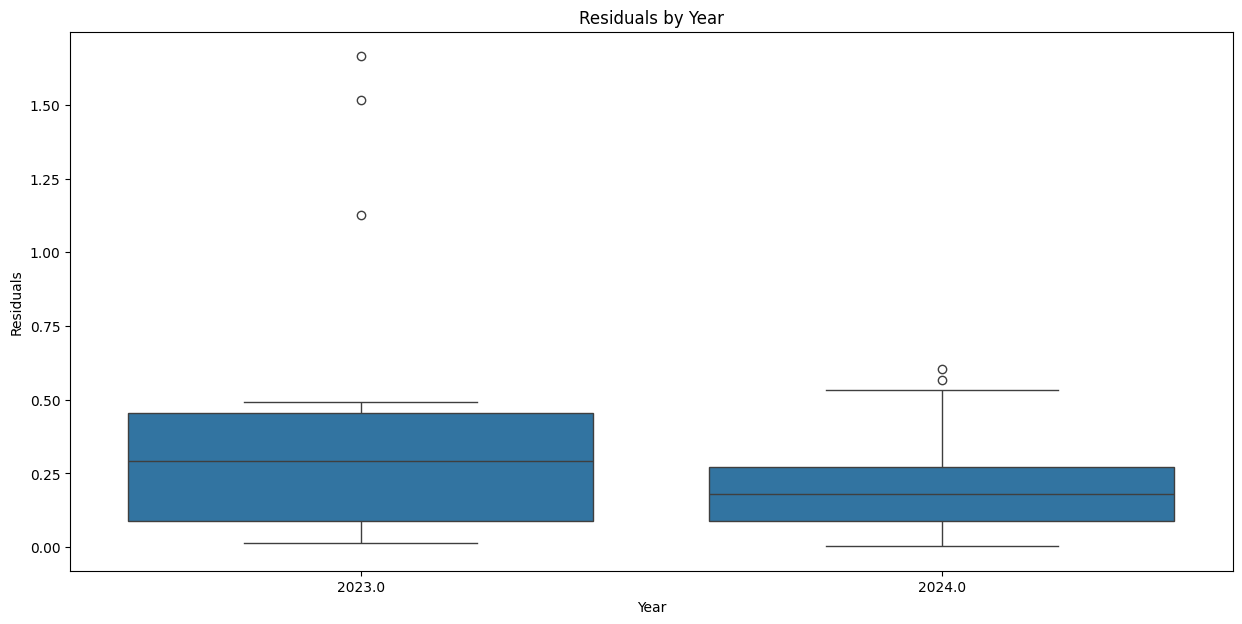

In [ ]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


residuals = y_test - y_pred


data['Year'] = pd.to_datetime(data['Date']).dt.year
residuals_df = pd.DataFrame({'Date': data['Date'][-len(y_test):], 'Residuals': residuals})
residuals_df['Year'] = pd.to_datetime(residuals_df['Date']).dt.year
plt.figure(figsize=(15, 7))
sns.boxplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals by Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.17680337838025625


Model R^2 Score: 0.9934644337385867


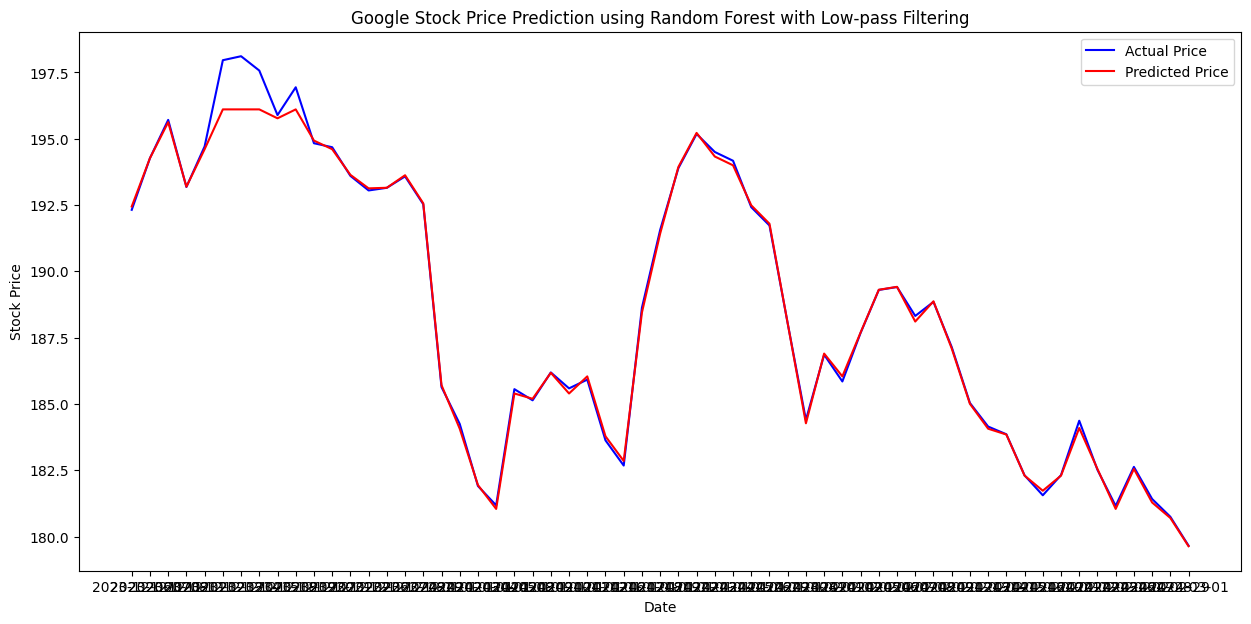

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv', thousands=',')
data = data[['Date', 'Close']]
data['Close'] = data['Close'].apply(lambda x: float(x))


close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0

filtered_close = np.fft.ifft(fft_list)


data['Filtered_Close'] = filtered_close.real


X = data[['Filtered_Close']]
y = data['Close']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"Model R^2 Score: {r2}")


plt.figure(figsize=(15, 7))
plt.plot(data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Google Stock Price Prediction using Random Forest with Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Mean Absolute Percentage Error (MAPE): 0.10%


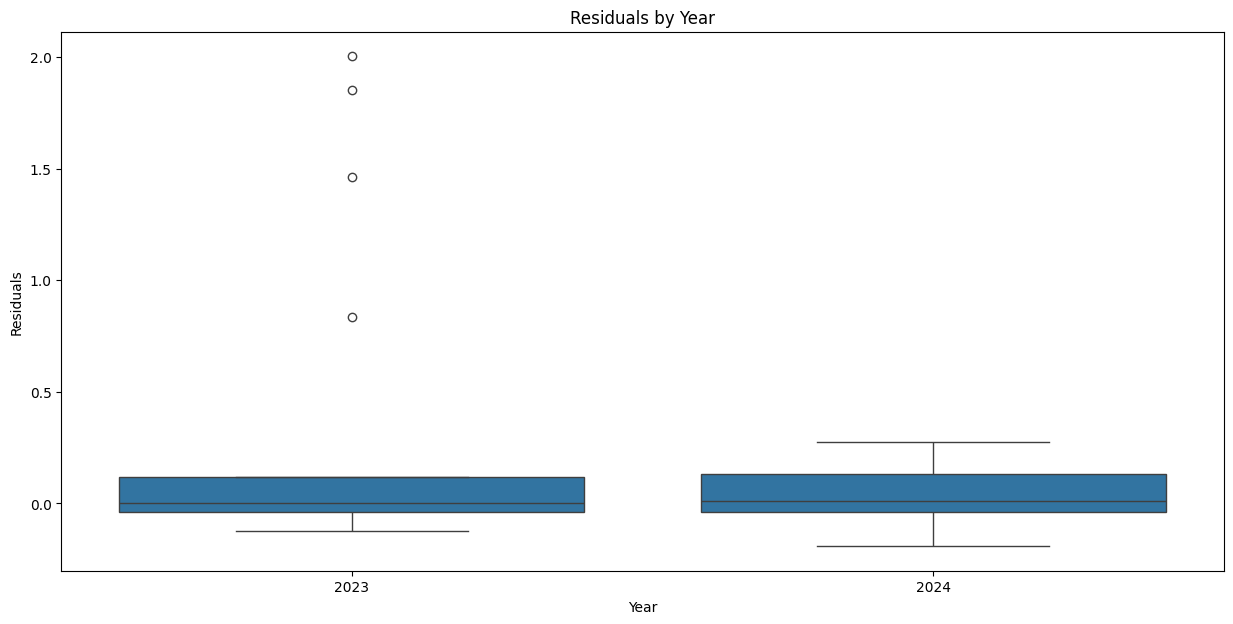

In [ ]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

residuals = y_test - y_pred


data['Year'] = pd.to_datetime(data['Date']).dt.year
residuals_df = pd.DataFrame({'Date': data['Date'][-len(y_test):], 'Residuals': residuals})
residuals_df['Year'] = pd.to_datetime(residuals_df['Date']).dt.year
plt.figure(figsize=(15, 7))
sns.boxplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals by Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.18538088237199574


Model R^2 Score: 0.9915518086483159
Mean Squared Error: 0.24035287218318188


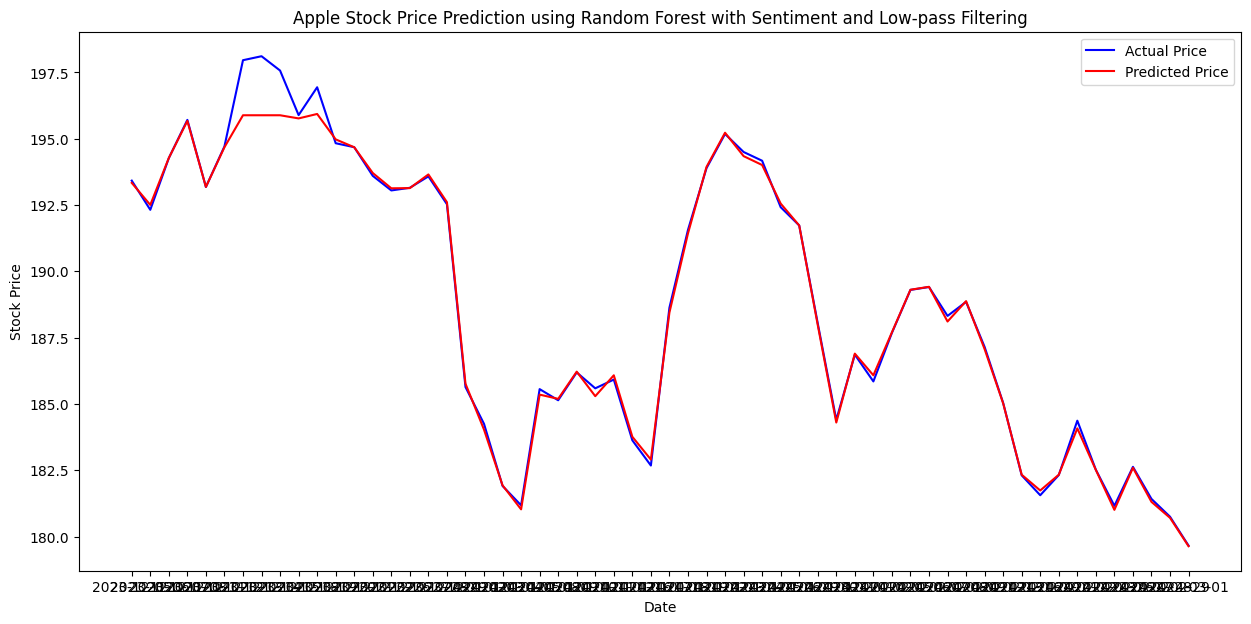

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv', thousands=',')
data = data[['Date', 'Close']]
data['Close'] = data['Close'].apply(lambda x: float(x))


close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0


filtered_close = np.fft.ifft(fft_list)


data['Filtered_Close'] = filtered_close.real


sentiment_data = pd.read_csv('/content/Apple_close_high_sent.csv')
sentiment_data = sentiment_data[['Date', 'Sent']]


encoder = OrdinalEncoder(categories=[['Negative', 'Neutral', 'Positive']])
sentiment_data['Sent_encoded'] = encoder.fit_transform(sentiment_data[['Sent']])


merged_data = pd.merge(data, sentiment_data, on='Date', how='inner')


X = merged_data[['Filtered_Close', 'Sent_encoded']]
y = merged_data['Close']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"Model R^2 Score: {r2}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(merged_data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction using Random Forest with Sentiment and Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Mean Absolute Percentage Error (MAPE): 0.11%


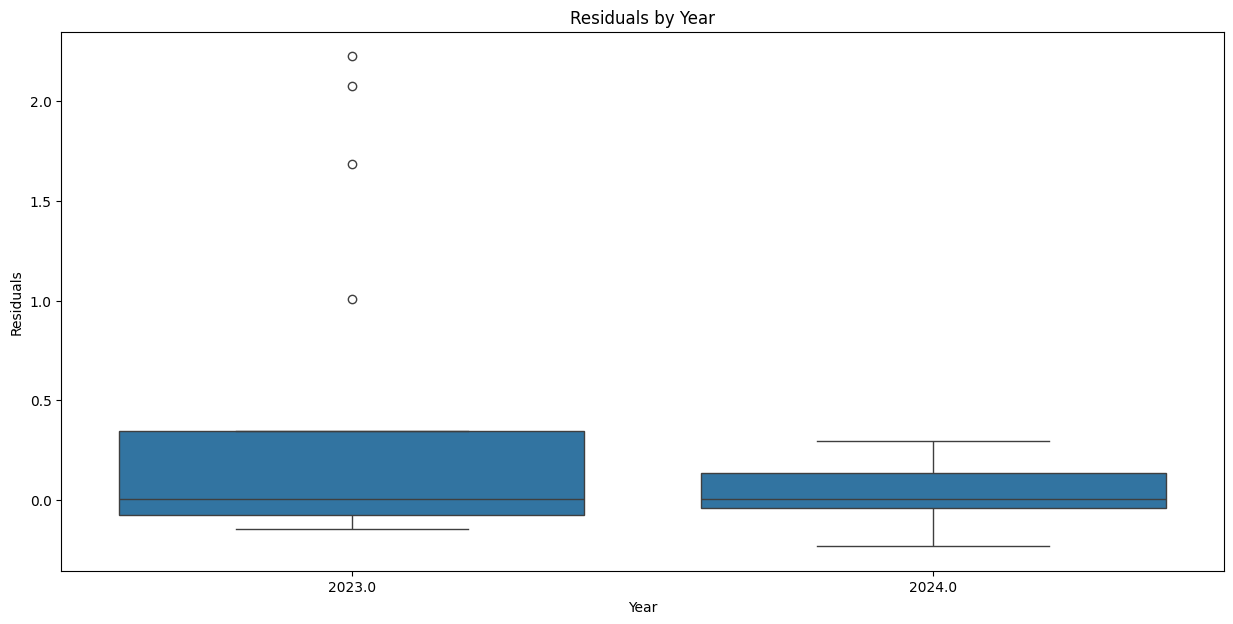

In [ ]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


residuals = y_test - y_pred


data['Year'] = pd.to_datetime(data['Date']).dt.year
residuals_df = pd.DataFrame({'Date': data['Date'][-len(y_test):], 'Residuals': residuals})
residuals_df['Year'] = pd.to_datetime(residuals_df['Date']).dt.year
plt.figure(figsize=(15, 7))
sns.boxplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals by Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


Model R^2 Score: 0.9946789094387654
Mean Squared Error: 0.1509323636188883


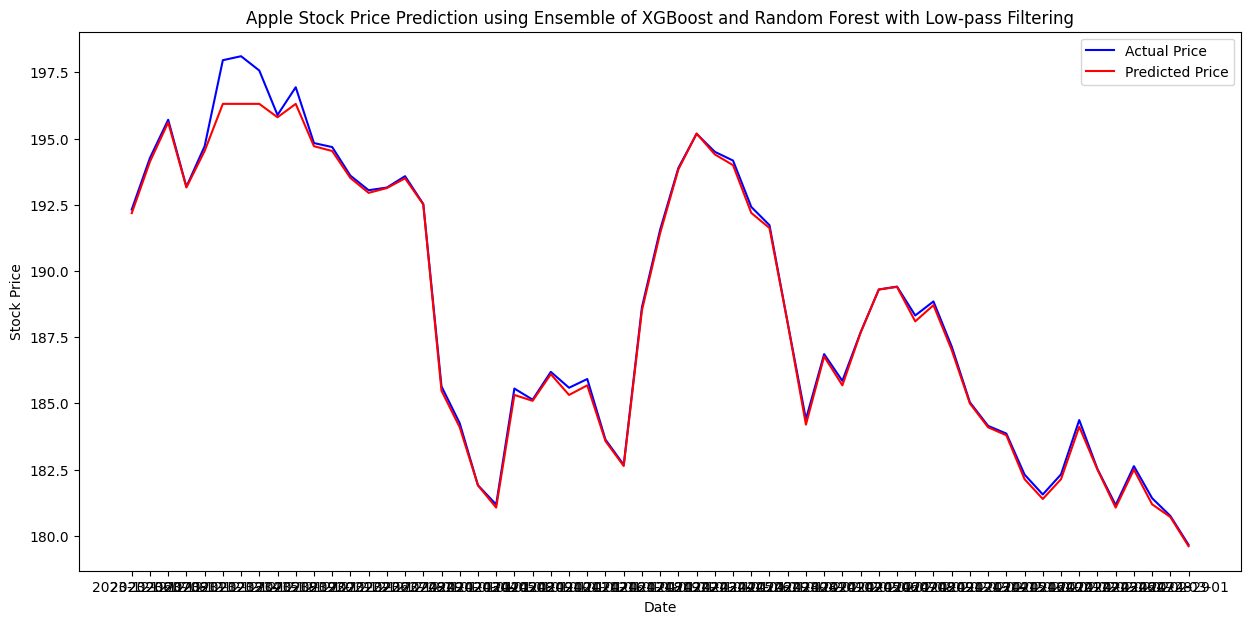

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_squared_error


data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv', thousands=',')
data = data[['Date', 'Close']]
data['Close'] = data['Close'].apply(lambda x: float(x))


close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))


fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0


filtered_close = np.fft.ifft(fft_list)


data['Filtered_Close'] = filtered_close.real


X = data[['Filtered_Close']]
y = data['Close']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=90, random_state=10)
rf_model = RandomForestRegressor(n_estimators=90, random_state=42)
ensemble_model = VotingRegressor([('xgb', xgb_model), ('rf', rf_model)])


ensemble_model.fit(X_train, y_train)


y_pred = ensemble_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Model R^2 Score: {r2}")

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


plt.figure(figsize=(15, 7))
plt.plot(data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction using Ensemble of XGBoost and Random Forest with Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Mean Absolute Percentage Error (MAPE): 0.10%


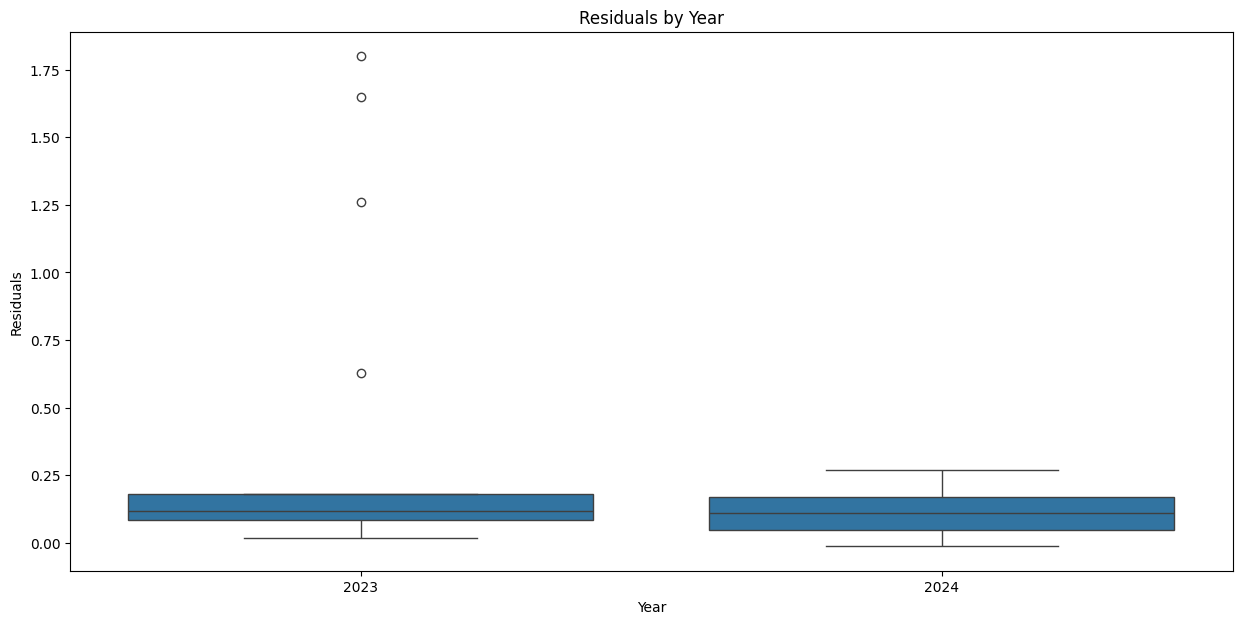

In [ ]:
from sklearn.metrics import mean_absolute_error
import seaborn as sns


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


residuals = y_test - y_pred


data['Year'] = pd.to_datetime(data['Date']).dt.year
residuals_df = pd.DataFrame({'Date': data['Date'][-len(y_test):], 'Residuals': residuals})
residuals_df['Year'] = pd.to_datetime(residuals_df['Date']).dt.year
plt.figure(figsize=(15, 7))
sns.boxplot(x='Year', y='Residuals', data=residuals_df)
plt.title('Residuals by Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


Model R^2 Score: 0.9937021382325445
Mean Squared Error: 0.1791755301705906


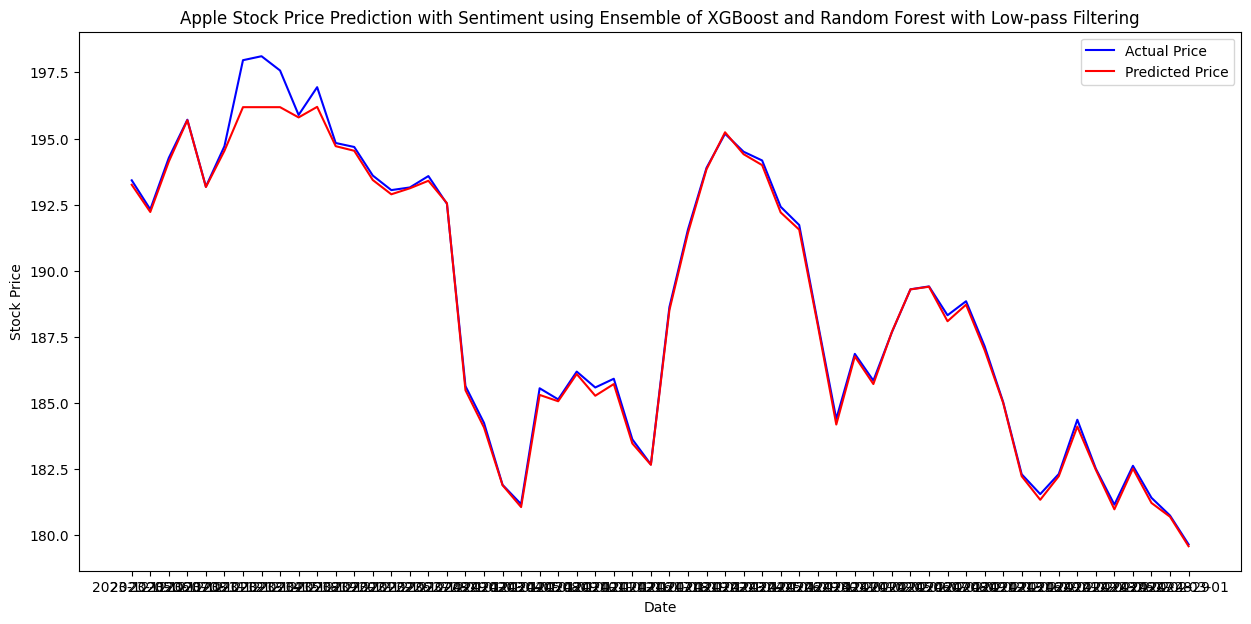

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_squared_error


apple_stock_data = pd.read_csv('/content/Apple_stock_yahoo_closehigh.csv', thousands=',')
apple_stock_data['Close'] = apple_stock_data['Close'].apply(lambda x: float(x))


apple_sentiment_data = pd.read_csv('/content/Apple_close_high_sent.csv')


label_encoder = LabelEncoder()
apple_sentiment_data['Sent'] = label_encoder.fit_transform(apple_sentiment_data['Sent'])


merged_data = pd.merge(apple_stock_data, apple_sentiment_data, on='Date', how='inner')


close_fft = np.fft.fft(np.asarray(merged_data['Close'].tolist()))
fft_df = pd.DataFrame({'fft': close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[500:-500] = 0

filtered_close = np.fft.ifft(fft_list)

merged_data['Filtered_Close'] = filtered_close.real

X = merged_data[['Filtered_Close', 'Sent']]
y = merged_data['Close']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=90, random_state=10)
rf_model = RandomForestRegressor(n_estimators=90, random_state=42)
ensemble_model = VotingRegressor([('xgb', xgb_model), ('rf', rf_model)])
ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"Model R^2 Score: {r2}")


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


plt.figure(figsize=(15, 7))
plt.plot(merged_data['Date'][-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(merged_data['Date'][-len(y_test):], y_pred, color='red', label='Predicted Price')
plt.title('Apple Stock Price Prediction with Sentiment using Ensemble of XGBoost and Random Forest with Low-pass Filtering')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 0.10998979427054374%
